In [1]:
import numpy, scipy, sklearn, IPython.display as ipd
import matplotlib.pyplot as plt
import librosa, librosa.display

In [2]:
x, sr = librosa.load('music.wav')

In [3]:
ipd.Audio(x, rate=sr)

In [4]:
S = librosa.stft(x)

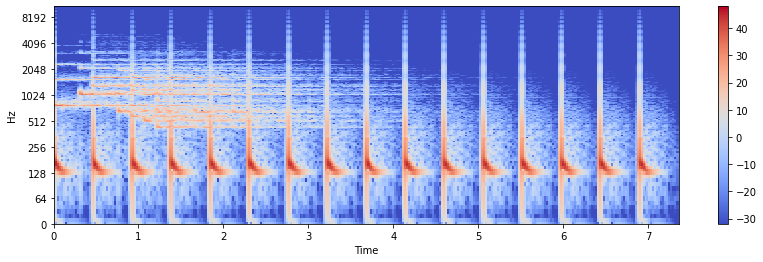

In [5]:
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [6]:
X, X_phase = librosa.magphase(S)
n_components = 4
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)

/Users/kweiwen/Library/Python/3.7/lib/python/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [7]:
print(W.shape)
print(H.shape)

(1025, 3)
(3, 317)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


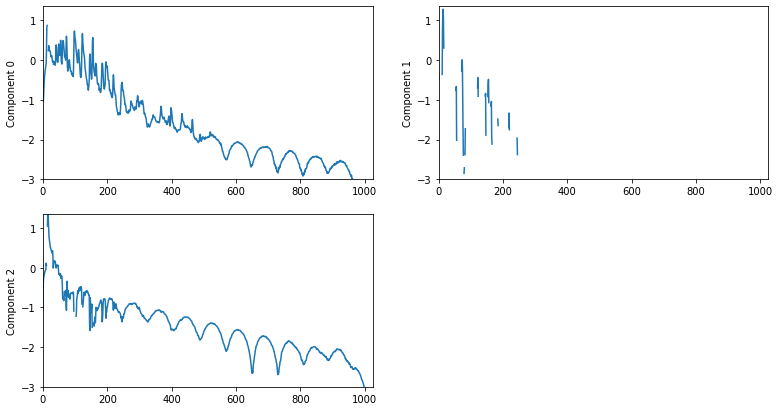

In [8]:
plt.figure(figsize=(13, 7))
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

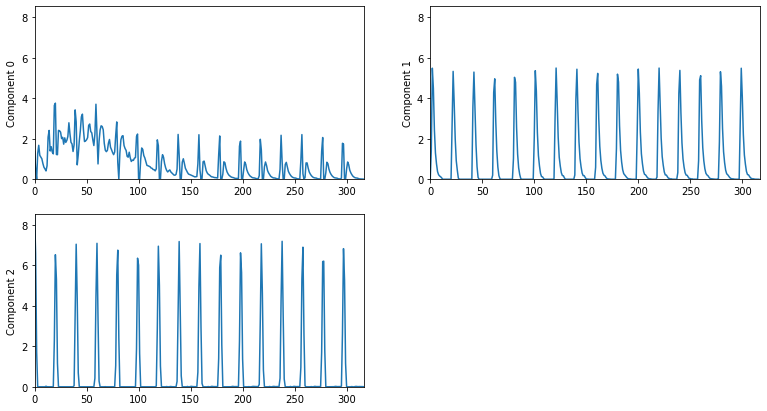

In [9]:
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [10]:
for n in range(n_components):
    
    # Re-create the STFT of a single NMF component.
    Y = scipy.outer(W[:,n], H[n])*X_phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)
    
    print('Component {}:'.format(n))
    ipd.display( ipd.Audio(y, rate=sr) )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.outer is deprecated and will be removed in SciPy 2.0.0, use numpy.outer instead
  after removing the cwd from sys.path.


Component 0:


Component 1:


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.outer is deprecated and will be removed in SciPy 2.0.0, use numpy.outer instead
  after removing the cwd from sys.path.


Component 2:


In [11]:
# Re-create the STFT from all NMF components.
Y = numpy.dot(W, H)*X_phase

# Transform the STFT into the time domain.
reconstructed_signal = librosa.istft(Y, length=len(x))
ipd.Audio(reconstructed_signal, rate=sr)

In [12]:
residual = x - reconstructed_signal
residual[0] = 1 # hack to prevent automatic gain scaling
ipd.Audio(residual, rate=sr)